In [9]:
import pandas as pd

file_path = 'Amazon Sales data.csv'
data = pd.read_csv(file_path)

data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [19]:
# Sales distribution by Region
sales_by_region = data.groupby('Region').agg({'Units Sold': 'sum', 'Total Profit': 'sum'}).reset_index()

# Sort by Units Sold for better visualization
sales_by_region_sorted = sales_by_region.sort_values(by='Units Sold', ascending=False)

sales_by_region_sorted




,Region,Units Sold,Total Profit
6,Sub-Saharan Africa,182870,12183211.40
3,Europe,98117,11082938.63
1,Australia and Oceania,68325,4722160.03
0,Asia,59967,6113845.87
4,Middle East and North Africa,48678,5761191.86
2,Central America and the Caribbean,35771,2846907.85
5,North America,19143,1457942.76


In [11]:
# Sales distribution by Country
sales_by_country = data.groupby('Country').agg({'Units Sold': 'sum', 'Total Profit': 'sum'}).reset_index()

# Sort by Units Sold for better visualization
sales_by_country_sorted = sales_by_country.sort_values(by='Units Sold', ascending=False)

# Display the top 10 countries by Units Sold
sales_by_country_sorted.head(20)


,Country,Units Sold,Total Profit
59,Sao Tome and Principe,24568,176193.13
16,Djibouti,23198,2425317.87
41,Mexico,19143,1457942.76
71,The Gambia,14813,1385883.27
46,Myanmar,14180,1802771.70
2,Australia,12995,576605.12
50,Norway,12574,794398.84
24,Honduras,11199,1609947.52
10,Cameroon,10948,781681.30
73,Tuvalu,9925,951410.50


In [12]:
# Sales distribution by Item Type
sales_by_item_type = data.groupby('Item Type').agg({'Units Sold': 'sum', 'Total Profit': 'sum'}).reset_index()

# Sort by Units Sold for better visualization
sales_by_item_type_sorted = sales_by_item_type.sort_values(by='Units Sold', ascending=False)

sales_by_item_type_sorted


,Item Type,Units Sold,Total Profit
4,Cosmetics,83718,14556048.66
3,Clothes,71260,5233334.40
1,Beverages,56708,888047.28
5,Fruits,49998,120495.18
9,Personal Care,48708,1220622.48
8,Office Supplies,46967,5929583.75
6,Household,44727,7412605.71
0,Baby Food,40545,3886643.70
2,Cereal,25877,2292443.43
11,Vegetables,20051,1265819.63


In [13]:
# Sales distribution by Sales Channel
sales_by_channel = data.groupby('Sales Channel').agg({'Units Sold': 'sum', 'Total Profit': 'sum'}).reset_index()

sales_by_channel


,Sales Channel,Units Sold,Total Profit
0,Offline,276782,24920726.67
1,Online,236089,19247471.73


In [14]:
# Calculate Total Revenue by Item Type
item_type_revenue = data.groupby('Item Type').agg({'Total Revenue': 'sum'}).reset_index()

# Merge Total Profit by Item Type with its Revenue
item_type_profit_revenue = pd.merge(sales_by_item_type, item_type_revenue, on="Item Type")

# Calculate Profit Percentage for each Item Type
item_type_profit_revenue['Profit Percentage'] = (item_type_profit_revenue['Total Profit'] / item_type_profit_revenue['Total Revenue']) * 100

# Sort by Profit Percentage for better visualization
item_type_profit_percentage_sorted = item_type_profit_revenue.sort_values(by='Profit Percentage', ascending=False)

item_type_profit_percentage_sorted[['Item Type', 'Profit Percentage']]


,Item Type,Profit Percentage
3,Clothes,67.203514
2,Cereal,43.067574
11,Vegetables,40.977541
4,Cosmetics,39.768984
0,Baby Food,37.550924
10,Snacks,36.138419
1,Beverages,33.003161
9,Personal Care,30.661936
5,Fruits,25.830654
6,Household,24.799856


In [15]:
# Calculate Total Profit and Total Revenue by Region and Item Type
region_item_profit_revenue = data.groupby(['Region', 'Item Type']).agg({
    'Total Profit': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

# Calculate Profit Percentage for each combination
region_item_profit_revenue['Profit Percentage'] = (region_item_profit_revenue['Total Profit'] / region_item_profit_revenue['Total Revenue']) * 100

# Find the item type with the highest profit percentage for each region
highest_profit_percentage_by_region = region_item_profit_revenue.loc[region_item_profit_revenue.groupby('Region')['Profit Percentage'].idxmax()]

highest_profit_percentage_by_region[['Region', 'Item Type', 'Profit Percentage']]


,Region,Item Type,Profit Percentage
0,Asia,Clothes,67.203514
10,Australia and Oceania,Clothes,67.203514
17,Central America and the Caribbean,Clothes,67.203514
24,Europe,Clothes,67.203514
31,Middle East and North Africa,Clothes,67.203514
36,North America,Personal Care,30.661936
40,Sub-Saharan Africa,Clothes,67.203514


In [16]:
# Calculate Total Profit by Country, Region, and Item Type
country_region_item_profit = data.groupby(['Item Type', 'Region', 'Country']).agg({
    'Total Profit': 'sum'
}).reset_index()

# Find the combination of country and region with the highest profit for each item type
highest_profit_by_item_type = country_region_item_profit.loc[country_region_item_profit.groupby('Item Type')['Total Profit'].idxmax()]

highest_profit_by_item_type[['Item Type', 'Region', 'Country', 'Total Profit']]


,Item Type,Region,Country,Total Profit
1,Baby Food,Australia and Oceania,Tuvalu,951410.50
7,Beverages,Australia and Oceania,Australia,147031.74
19,Cereal,Sub-Saharan Africa,Djibouti,766835.04
24,Clothes,Australia and Oceania,Fiji,727423.20
45,Cosmetics,Middle East and North Africa,Pakistan,1719922.04
56,Fruits,Sub-Saharan Africa,Sao Tome and Principe,37930.99
59,Household,Central America and the Caribbean,Honduras,1487261.02
66,Meat,Australia and Oceania,East Timor,337937.60
72,Office Supplies,Europe,Lithuania,1046233.75
83,Personal Care,North America,Mexico,305456.34


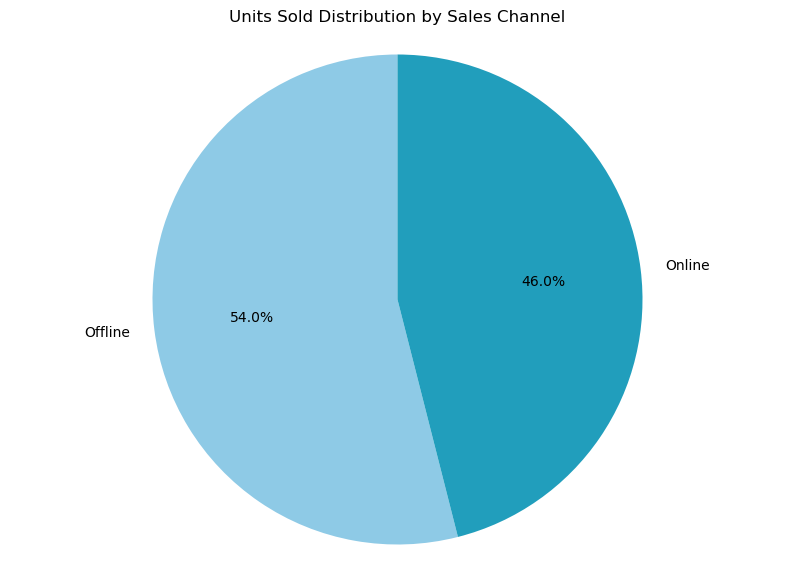

In [41]:
# Summarize Units Sold by Sales Channel
units_sold_by_channel = data.groupby('Sales Channel')['Units Sold'].sum()

# Define a color palette for the sales channel pie chart for units sold
channel_colors_units_sold = ['#8ecae6', '#219ebc']

# Plotting with specified colors for units sold
plt.figure(figsize=(10, 7))
plt.pie(units_sold_by_channel, labels=units_sold_by_channel.index, autopct='%1.1f%%', startangle=90, colors=channel_colors_units_sold)
plt.title('Units Sold Distribution by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()


In [42]:
units_sold_by_channel

Sales Channel
Offline    276782
Online     236089
Name: Units Sold, dtype: int64

In [26]:
# Correct approach to calculate profit percentage for each item type
item_types_summary = data.groupby('Item Type').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

item_types_summary['Profit Percentage'] = (item_types_summary['Total Profit'] / item_types_summary['Total Revenue']) * 100

item_types_summary[['Item Type', 'Profit Percentage']].sort_values(by='Profit Percentage', ascending=False)


,Item Type,Profit Percentage
3,Clothes,67.203514
2,Cereal,43.067574
11,Vegetables,40.977541
4,Cosmetics,39.768984
0,Baby Food,37.550924
10,Snacks,36.138419
1,Beverages,33.003161
9,Personal Care,30.661936
5,Fruits,25.830654
6,Household,24.799856


In [29]:
from datetime import datetime

# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='mixed')

# Calculate the shipping time in days for each order
data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days

# Calculate average shipping time by order priority
average_shipping_time_by_priority = data.groupby('Order Priority')['Shipping Time (Days)'].mean().reset_index()

average_shipping_time_by_priority.sort_values(by='Shipping Time (Days)', ascending=True)


,Order Priority,Shipping Time (Days)
1,H,21.400000
2,L,23.592593
0,C,23.863636
3,M,25.333333


In [30]:

# Assuming 'data' is your DataFrame
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate Shipping Time in days
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Group by Region and Order Priority
shipping_analysis = data.groupby(['Region', 'Order Priority']).agg({
    'Shipping Time': 'mean',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Order Count'}).reset_index()

# Sort or filter as needed to analyze
print(shipping_analysis)


                               Region Order Priority  Shipping Time  \
0                                Asia              C      21.000000   
1                                Asia              H      22.000000   
2                                Asia              L      38.000000   
3                                Asia              M      28.000000   
4               Australia and Oceania              C      24.000000   
5               Australia and Oceania              H      20.200000   
6               Australia and Oceania              L      42.000000   
7               Australia and Oceania              M      28.000000   
8   Central America and the Caribbean              C      32.500000   
9   Central America and the Caribbean              H      19.500000   
10  Central America and the Caribbean              L      19.500000   
11  Central America and the Caribbean              M      44.000000   
12                             Europe              C      24.000000   
13    

In [44]:
# Convert 'Order Date' and 'Ship Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate 'Shipping Time' in days
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days

# Filter orders with shipping time less than 10 days
orders_less_than_10_days = data[data['Shipping Time'] < 10]

# Select relevant columns to display
columns_to_display = ['Region', 'Country', 'Order Priority', 'Item Type', 'Order Date', 'Ship Date', 'Units Sold', 'Total Profit']
filtered_orders_details = orders_less_than_10_days[columns_to_display]

# Display the filtered details
print(filtered_orders_details)




                               Region                Country Order Priority  \
2                              Europe                 Russia              L   
4                  Sub-Saharan Africa                 Rwanda              L   
6                  Sub-Saharan Africa                 Angola              M   
13  Central America and the Caribbean               Honduras              H   
14                               Asia               Mongolia              C   
24                             Europe               Moldova               L   
27                 Sub-Saharan Africa                   Mali              L   
34                 Sub-Saharan Africa               Djibouti              M   
37                 Sub-Saharan Africa             The Gambia              M   
42                 Sub-Saharan Africa             The Gambia              H   
44                               Asia                Myanmar              H   
46                             Europe               

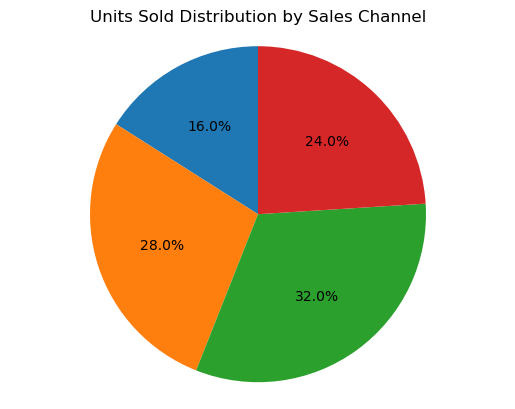

In [47]:
prior = filtered_orders_details.groupby('Order Priority')['Order Priority'].count()

# Define a color palette for the sales channel pie chart for units sold
# channel_colors_units_sold = ['#8ecae6', '#219ebc']

# Plotting with specified colors for units sold
# plt.figure(figsize=(10, 7))
plt.pie(prior,  autopct='%1.1f%%', startangle=90)
plt.title('Units Sold Distribution by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

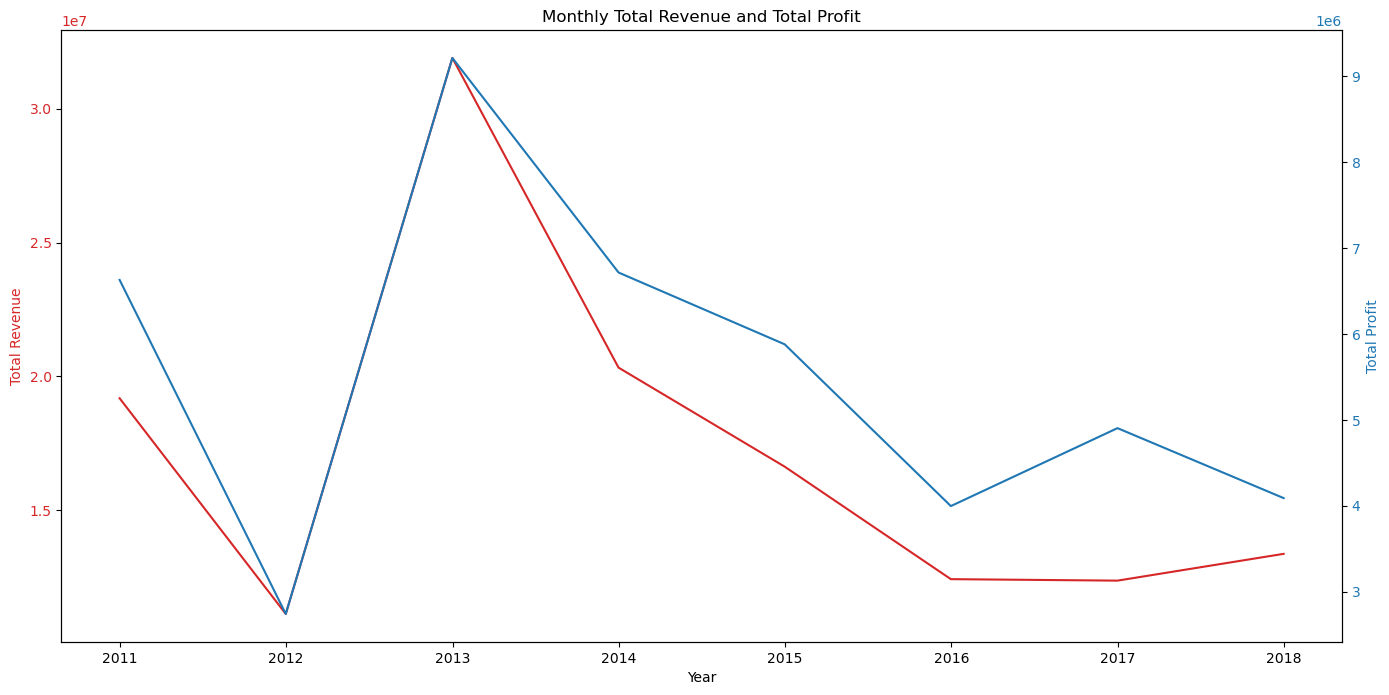

In [49]:
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregate total sales and profits by month
monthly_summary = data.resample('Y', on='Order Date').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue', color=color)
ax1.plot(yearly_summary['Order Date'], yearly_summary['Total Revenue'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total Profit', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_summary['Order Date'], yearly_summary['Total Profit'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Total Revenue and Total Profit')
plt.show()


In [50]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the sales data
# Group the data by 'Region' and 'Item Type', and then aggregate the total profit for each group
item_profit_by_region = data.groupby(['Region', 'Item Type'])['Total Profit'].sum().reset_index()

# Pivot the data for better readability and analysis, with regions as rows and item types as columns
pivot_table = item_profit_by_region.pivot(index='Region', columns='Item Type', values='Total Profit')

# Sort, filter, or further analyze the pivot table as needed
print(pivot_table)


Item Type                           Baby Food  Beverages      Cereal  \
Region                                                                 
Asia                                      NaN        NaN         NaN   
Australia and Oceania              1236498.14  293906.88    60418.38   
Central America and the Caribbean         NaN  127722.96   248406.36   
Europe                             2117259.82  153217.44         NaN   
Middle East and North Africa              NaN        NaN   359941.17   
North America                             NaN        NaN         NaN   
Sub-Saharan Africa                  532885.74  313200.00  1623677.52   

Item Type                             Clothes   Cosmetics    Fruits  \
Region                                                                
Asia                               1042333.92  1208744.24  15103.47   
Australia and Oceania               727423.20  1678540.98  18279.85   
Central America and the Caribbean   403773.12   296448.35       NaN

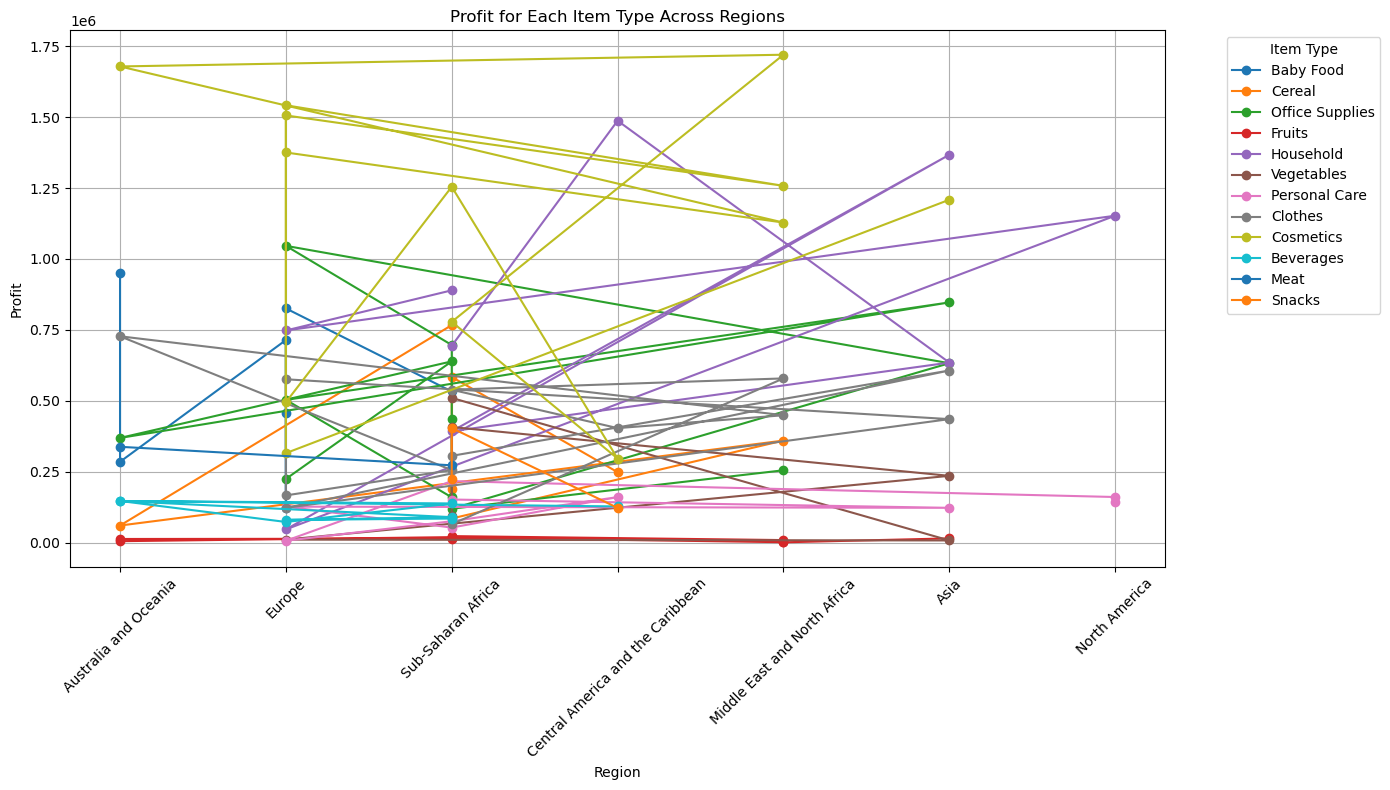

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame that includes 'Region', 'Item Type', and 'Profit' columns
# If you're starting from a pivot table, you might need to transform it to this format

# Plotting
plt.figure(figsize=(14, 8))

for item_type in data['Item Type'].unique():
    subset = data[data['Item Type'] == item_type]
    plt.plot(subset['Region'], subset['Total Profit'], marker='o', label=item_type)

plt.title('Profit for Each Item Type Across Regions')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)  # Rotate region names for better readability
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)  # Add grid for better readability

plt.tight_layout()  # Adjust layout
plt.show()


In [59]:

grouped_data = data.groupby('Region').agg({
    'Total Profit': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Then, calculate Profit per Unit for each region
grouped_data['Profit per Unit'] = grouped_data['Total Profit'] / grouped_data['Units Sold']

# Display the results
print(grouped_data[['Region', 'Profit per Unit']])

                              Region  Profit per Unit
0                               Asia       101.953506
1              Australia and Oceania        69.113209
2  Central America and the Caribbean        79.587036
3                             Europe       112.956354
4       Middle East and North Africa       118.353093
5                      North America        76.160621
6                 Sub-Saharan Africa        66.622253
